In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from collections import Counter, defaultdict
os.chdir("..")

In [2]:
import chess
from chess_analytics.game_library import GameLibrary
from chess_analytics.game_reader import GameReader

### Read in library of games

In [3]:
library_menso = GameLibrary("data/user_games/ManMetHoed")

Loading library (5216 files)...
...loaded.

Number of main-lines played: 64


In [34]:
library_menso.df.opening_chesscom_general.value_counts()[-20:]

Ponziani-Opening                            4
Dresden-Opening                             4
Torre-Attack                                3
Grob-Opening                                3
Polish-Opening-Symmetrical-Variation        2
Queens-Indian-Defense                       2
Polish-Opening-Baltic-Defense               2
Barnes-Opening                              2
Polish-Opening-Bugayev-Attack               2
NAO                                         2
Anderssen-Opening                           1
Ware-Opening                                1
Grunfeld-Defense-Schlechter-Variation       1
Bogo-Indian-Defense-Exchange-Variation      1
Benko-Gambit                                1
Budapest-Gambit-Adler-Variation             1
Portuguese-Opening                          1
Alekhines-Defense-Scandinavian-Variation    1
Polish-Opening-Czech-Defense                1
Benoni-Defense                              1
Name: opening_chesscom_general, dtype: int64

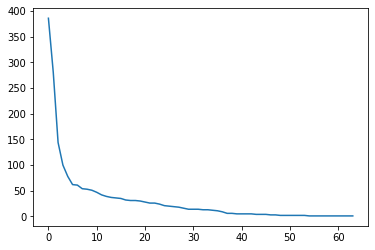

In [33]:
# Opening diversity graph...
fig, ax = plt.subplots()
frequencies = library_menso.df.opening_chesscom_general.value_counts().values
ranks = range(len(frequencies))
ax.plot(ranks, frequencies)

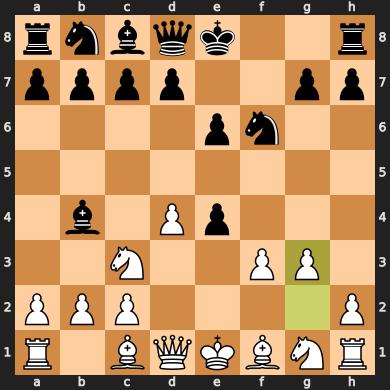

In [22]:
library_menso.df.Game.iloc[0].play_nth_move(11)

In [23]:
board_ = library_menso.df.Game.iloc[0].play_nth_move(11)

In [24]:
type(board_)

chess.Board

In [25]:
from chess_analytics.utils import evaluate_position, evaluate_position_sf

In [26]:
evaluate_position(board_.fen())

{'depth': 20,
 'seldepth': 38,
 'multipv': 1,
 'score': PovScore(Cp(+219), BLACK),
 'nodes': 3926394,
 'nps': 1587704,
 'tbhits': 0,
 'time': 2.473,
 'pv': [Move.from_uci('e8g8'),
  Move.from_uci('f1g2'),
  Move.from_uci('f6d5'),
  Move.from_uci('d1d2'),
  Move.from_uci('e4e3'),
  Move.from_uci('d2d3'),
  Move.from_uci('b7b6'),
  Move.from_uci('c1e3'),
  Move.from_uci('c8a6'),
  Move.from_uci('d3d2'),
  Move.from_uci('b8c6'),
  Move.from_uci('g1e2'),
  Move.from_uci('c6a5'),
  Move.from_uci('e3g5'),
  Move.from_uci('d8e8'),
  Move.from_uci('e1g1'),
  Move.from_uci('h7h6'),
  Move.from_uci('g5h6'),
  Move.from_uci('g7h6'),
  Move.from_uci('d2h6'),
  Move.from_uci('f8f6'),
  Move.from_uci('h6g5'),
  Move.from_uci('e8g6'),
  Move.from_uci('g5g6'),
  Move.from_uci('f6g6'),
  Move.from_uci('c3d5'),
  Move.from_uci('e6d5'),
  Move.from_uci('e2f4'),
  Move.from_uci('a6f1'),
  Move.from_uci('a1f1'),
  Move.from_uci('g6g5')],
 'hashfull': 959}

In [3]:
library = GameLibrary("data/user_games/Luc777")

Loading library (1969 files)...
...loaded.

Number of main-lines played: 72


In [4]:
# Creates a field in df called "Game" which contains a GameReader object of the game
library.loadin_games()

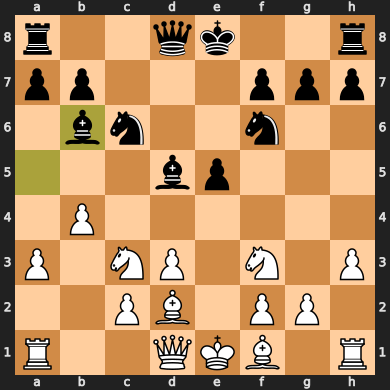

In [5]:
library.df.Game.iloc[100].play_nth_move(20)

In [7]:
library.df.head(3)

,White,Black,Result,WElo,BElo,ECO,Opening,Date,TimeControl,id,fname,opening_chesscom_spec,opening_chesscom_general,Game
0,DarthEast,Luc777,1.0,1493,976,A40,"Hartlaub Gambit, English *",2015.06.19,1/259200,https://www.chess.com/game/daily/113173972,data/user_games/Luc777/2015/06/game_0.txt,Queens-Pawn-Opening,Queens-Pawn-Opening,1. d4 f6 2. Nf3 Nc6 3. e3
1,Luc777,DarthEast,0.0,976,1493,C50,Italian Game; C50 *,2015.06.10,1/259200,https://www.chess.com/game/daily/112662900,data/user_games/Luc777/2015/06/game_1.txt,Italian-Game-Hungarian-Defense,Italian-Game,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. c3 Nf6 5. d4...
2,herbertteo,Luc777,0.0,1333,1295,B02,Alekhine's Defense; B02 *,2015.01.16,300,https://www.chess.com/game/live/1031392476,data/user_games/Luc777/2015/01/game_6.txt,Alekhines-Defense-Scandinavian-Variation-3.exd5,Alekhines-Defense,1. e4 d5 2. exd5 Nf6 3. Nc3 c6 4. dxc6 Nxc6 5....


### Investigating unique FEN positions
Split into user playing as white and playing as black

In [9]:
# Positional sameness, count all positions. (~30s/1000 games)
# Example: 2k games, 124k positions, 108k unique.
# Most common position happened 1965 times, 2nd most 1600, 3rd most 862. 105150 occured once. 
def rank_positions_by_color(library):
    """Hash FEN positions to get most common positions played by color.
    TODO - Track opponents and results by position s.t. can give win-rate
    and opponents who you commonly play this position against."""
    fen_positions_by_color = defaultdict(list)
    for game in library.df.Game.values:
        color = 'white' if library.username == game.describe()[0] else 'black'
        for i in range(len(game.moves)):
            board = game.play_nth_move(i)
            fen_positions_by_color[color].append(board.fen())
    
    return fen_positions_by_color

In [10]:
fen_positions_by_color = rank_positions_by_color(library)

In [11]:
print(len(fen_positions_by_color))
print(len(fen_positions_by_color['white']), len(fen_positions_by_color['black']))# 124140

2
61284 62856


In [12]:
unique_positions_fen_wh = set(fen_positions_by_color['white'])
len(unique_positions_fen_wh) # 107655

53285

In [13]:
unique_positions_fen_bk = set(fen_positions_by_color['black'])
len(unique_positions_fen_bk) # 107655

55591

In [14]:
positions_counter_fen = Counter(fen_positions_by_color['white'])
positions_sorted_fen = sorted(positions_counter_fen.items(), key=lambda x: -x[1])

In [15]:
positions_sorted_fen

[('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 957),
 ('rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1', 952),
 ('rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2', 461),
 ('rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2', 457),
 ('r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3', 239),
 ('rnbqkbnr/pp1ppppp/8/2p5/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2', 168),
 ('rnbqkbnr/pp1ppppp/8/2p5/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2', 160),
 ('r1bqkbnr/pppp1ppp/2n5/4p3/3PP3/5N2/PPP2PPP/RNBQKB1R b KQkq - 0 3', 119),
 ('rnbqkbnr/ppp2ppp/3p4/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 0 3', 111),
 ('r1bqkbnr/pppp1ppp/2n5/8/3pP3/5N2/PPP2PPP/RNBQKB1R w KQkq - 0 4', 95),
 ('rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2', 91),
 ('rnbqkbnr/ppp2ppp/3p4/4p3/3PP3/5N2/PPP2PPP/RNBQKB1R b KQkq - 0 3', 88),
 ('r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R b KQkq - 3 3', 77),
 ('rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBN

In [168]:
def fen_move_number(fen_position):
    fen_split = fen_position.split(" ")
    return int(fen_split[len(fen_split)-1])


def most_common_position_after_n_moves(fen_positions_sorted, n=1):
    """Given a positions sorted in descending order by frequency, get the most commmon one which occurs
    on the nth (full) move."""
    for position, count in fen_positions_sorted:
        if fen_move_number(position) == n:
            return position, count
            
    return "NA", 0

In [171]:
most_common_pos,count = most_common_position_after_n_moves(positions_sorted_fen, n=6)

In [173]:
# For the first 9 moves, extract the most common positions reached as White
common_positions_by_move = {}
for i in range(10):
    common_positions_by_move[i] = most_common_position_after_n_moves(positions_sorted_fen, n=i)

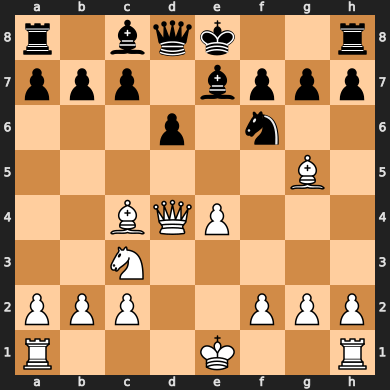

In [176]:
chess.Board(common_positions_by_move[8][0])

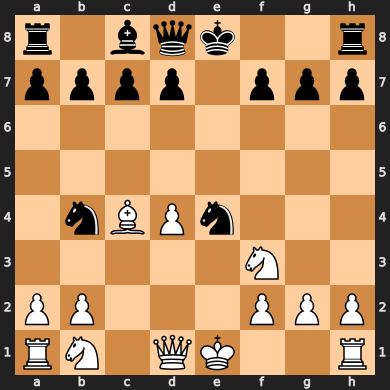

In [175]:
chess.Board(common_positions_by_move[9][0])

rnbqkb1r/1p2pppp/p2p1n2/8/3NP3/2N5/PPP2PPP/R1BQKB1R w KQkq - 0 6 16


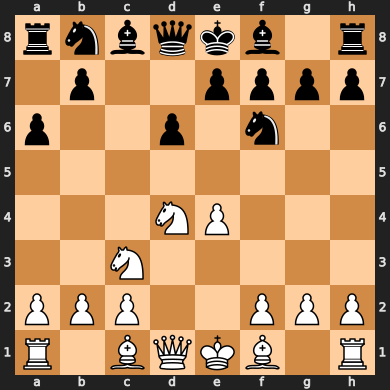

In [135]:
print(most_common_pos, count)
board_common = chess.Board(most_common_pos)

In [137]:
evaluate_position_sf(most_common_pos, threads=8)

{'type': 'cp', 'value': 166}

In [151]:
evaluate_position(most_common_pos)

{'depth': 20,
 'seldepth': 30,
 'multipv': 1,
 'score': PovScore(Cp(+67), WHITE),
 'nodes': 3688287,
 'nps': 1082561,
 'tbhits': 0,
 'time': 3.407,
 'pv': [Move.from_uci('c1g5'),
  Move.from_uci('e7e6'),
  Move.from_uci('d1f3'),
  Move.from_uci('h7h6'),
  Move.from_uci('g5e3'),
  Move.from_uci('e6e5'),
  Move.from_uci('d4b3'),
  Move.from_uci('c8d7'),
  Move.from_uci('f1d3'),
  Move.from_uci('f8e7'),
  Move.from_uci('h2h3'),
  Move.from_uci('e8g8'),
  Move.from_uci('e1g1'),
  Move.from_uci('d7e6'),
  Move.from_uci('a2a3'),
  Move.from_uci('b8d7'),
  Move.from_uci('a3a4'),
  Move.from_uci('a8c8'),
  Move.from_uci('a4a5'),
  Move.from_uci('d8c7'),
  Move.from_uci('f1d1'),
  Move.from_uci('g8h8'),
  Move.from_uci('f3g3'),
  Move.from_uci('f6h5')],
 'hashfull': 960,
 'currmove': Move.from_uci('f1a6'),
 'currmovenumber': 43}

In [183]:
### Same but for black
positions_counter_fen_bk = Counter(fen_positions_by_color['black'])
positions_sorted_fen_bk = sorted(positions_counter_fen_bk.items(), key=lambda x: -x[1])

In [184]:
positions_sorted_fen_bk

[('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', 1008),
 ('rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1', 626),
 ('rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2', 401),
 ('rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR b KQkq - 0 1', 237),
 ('rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R b KQkq - 1 2', 228),
 ('rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2', 215),
 ('r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3', 210),
 ('rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2', 150),
 ('rnbqkbnr/ppp1pppp/8/3p4/3P4/8/PPP1PPPP/RNBQKBNR w KQkq - 0 2', 120),
 ('rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR w KQkq - 1 2', 101),
 ('rnb1kbnr/ppp1pppp/8/3q4/8/8/PPPP1PPP/RNBQKBNR w KQkq - 0 3', 82),
 ('r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R b KQkq - 3 3', 75),
 ('rnbqkb1r/ppp1pppp/5n2/3P4/8/8/PPPP1PPP/RNBQKBNR w KQkq - 1 3', 68),
 ('r1bqkb1r/pppp1ppp/2n2n2/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R w KQkq - 

In [ ]:
# For first 9 moves, extract most common positions reached as Black
common_positions_by_move_bk = {}
for i in range(10):
    common_positions_by_move_bk[i] = most_common_position_after_n_moves(positions_sorted_fen_bk, n=i)

5


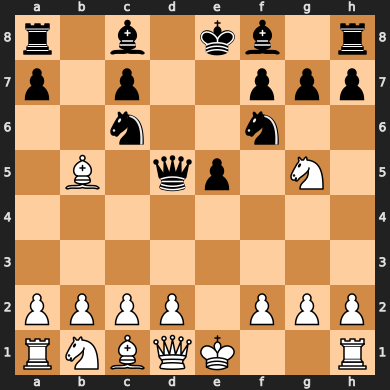

In [194]:
print(common_positions_by_move_bk[7][1])
chess.Board(common_positions_by_move_bk[7][0])

In [193]:
evaluate_position(common_positions_by_move_bk[7][0])

{'depth': 20,
 'seldepth': 33,
 'multipv': 1,
 'score': PovScore(Cp(+56), WHITE),
 'nodes': 3035172,
 'nps': 1128736,
 'tbhits': 0,
 'time': 2.689,
 'pv': [Move.from_uci('b5c6'),
  Move.from_uci('d5c6'),
  Move.from_uci('e1g1'),
  Move.from_uci('f8c5'),
  Move.from_uci('b1c3'),
  Move.from_uci('e8g8'),
  Move.from_uci('d2d3'),
  Move.from_uci('c8b7'),
  Move.from_uci('d1f3'),
  Move.from_uci('h7h6'),
  Move.from_uci('f3c6'),
  Move.from_uci('b7c6'),
  Move.from_uci('g5f3'),
  Move.from_uci('f8e8'),
  Move.from_uci('c1e3'),
  Move.from_uci('e5e4'),
  Move.from_uci('e3c5'),
  Move.from_uci('e4f3'),
  Move.from_uci('g2f3'),
  Move.from_uci('e8e5'),
  Move.from_uci('c5e3'),
  Move.from_uci('c6f3'),
  Move.from_uci('f1e1'),
  Move.from_uci('a8e8'),
  Move.from_uci('b2b3'),
  Move.from_uci('e5h5'),
  Move.from_uci('e3d2'),
  Move.from_uci('e8e1'),
  Move.from_uci('a1e1'),
  Move.from_uci('h5h4'),
  Move.from_uci('e1e7')],
 'hashfull': 893}

66


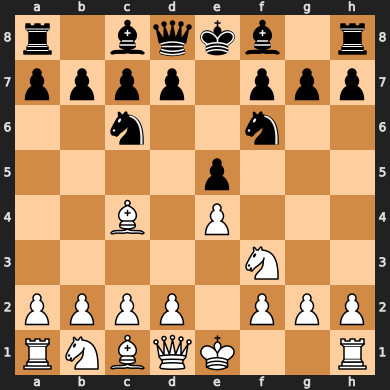

In [200]:
print(common_positions_by_move_bk[4][1])
black_common_pos = chess.Board(common_positions_by_move_bk[4][0])
black_common_pos

In [201]:
find_all_book_moves(black_common_pos, fbook)

Entry 1: d2d3, weight: 573
Entry 1: f3g5, weight: 269
Entry 1: d2d4, weight: 128


In [204]:
evaluate_position_sf(common_positions_by_move_bk[4][0])

{'type': 'cp', 'value': 233}

In [203]:
evaluate_position(common_positions_by_move_bk[4][0])

{'depth': 20,
 'seldepth': 34,
 'multipv': 1,
 'score': PovScore(Cp(+53), WHITE),
 'nodes': 4457232,
 'nps': 1051481,
 'tbhits': 0,
 'time': 4.239,
 'pv': [Move.from_uci('b1c3'),
  Move.from_uci('f8c5'),
  Move.from_uci('e1g1'),
  Move.from_uci('e8g8'),
  Move.from_uci('d2d3'),
  Move.from_uci('h7h6'),
  Move.from_uci('c1e3'),
  Move.from_uci('c5e3'),
  Move.from_uci('f2e3'),
  Move.from_uci('d7d6'),
  Move.from_uci('a2a3'),
  Move.from_uci('d8e8'),
  Move.from_uci('h2h3'),
  Move.from_uci('a7a6'),
  Move.from_uci('d1e1'),
  Move.from_uci('c8e6'),
  Move.from_uci('c4e6'),
  Move.from_uci('f7e6'),
  Move.from_uci('g1h2'),
  Move.from_uci('a8d8'),
  Move.from_uci('a1d1'),
  Move.from_uci('g8h7'),
  Move.from_uci('e1g3'),
  Move.from_uci('e8g6')],
 'hashfull': 973,
 'currmove': Move.from_uci('c4f7'),
 'currmovenumber': 33,
 'upperbound': True,
 'lowerbound': True}

In [144]:
def find_all_book_moves(board, fbook):
    '''Find all playable moves. Weight is ~ quality of the move, and 
    set to 2*(wins)+(draws), by the Polyglot move generator (convention).
    Explanation: http://www.open-aurec.com/wbforum/viewtopic.php?f=2&t=50331
    Other: https://metacpan.org/dist/Chess-Opening/view/lib/Chess/Opening/Book/Polyglot.pod'''
    with chess.polyglot.open_reader(fbook) as reader:
        for entry in reader.find_all(board):
            print(f"Entry 1: {entry.move}, weight: {entry.weight}")
        
    return None

In [145]:
find_all_book_moves(chess.Board(most_common_pos),fbook)

Entry 1: c1e3, weight: 39
Entry 1: c1g5, weight: 15
Entry 1: f1c4, weight: 8
Entry 1: f2f4, weight: 5


### Mate in N

In [229]:
# Find first position in DB with Mate in 2:
def find_forced_mate_positions(library):
    stockfish_engine = Stockfish("/usr/games/stockfish")
    forced_mate_boards = []
    for game in library.df.Game.values:
        color = 'white' if library.username == game.describe()[0] else 'black'
        for i in range(len(game.moves)):
            board = game.play_nth_move(i)
            stockfish_engine.set_fen_position(board.fen())
            proposed_moves = stockfish_engine.get_top_moves()
            if proposed_moves[0]['Mate'] == 2:
                forced_mate_boards.append(board.fen())
    return forced_mate_boards

In [230]:
%%time
forced_mate_boards = find_forced_mate_positions(library)

CPU times: user 2min 57s, sys: 8.58 s, total: 3min 5s
Wall time: 11min 44s


In [231]:
len(forced_mate_boards)

353

In [245]:
forced_mate_boards[200]

'8/p7/2p1R2Q/6p1/6k1/3P4/P2q1PPP/4R1K1 w - - 1 31'

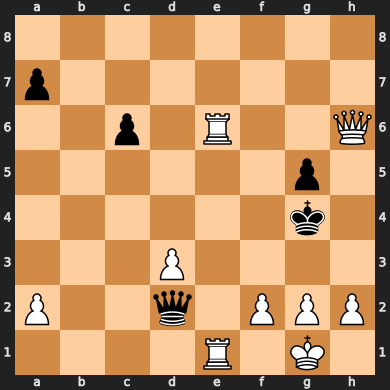

In [244]:
chess.Board(forced_mate_boards[200])

Yes!!!! This works :), and finds one correctly.

Now, let's test the time it takes to find every mate_in_2. (This appoarch is definitely inefficient). 11 mins.

In [285]:
def find_forced_mate(game, mate_in=2, extra_description=""):
    for j in range(len(game.moves)):
    # Find first Mate in 2 and break
        board = game.play_nth_move(j)
        stockfish_engine.set_fen_position(board.fen())
        proposed_moves = stockfish_engine.get_top_moves()
        if proposed_moves[0]['Mate'] == mate_in:
            describer = game.describe()
            description = f"{describer[0]} vs. {describer[1]} ({describer[2]}) {extra_description}"
            return (board.fen(), description, describer[9])
    return (None, None, None)


In [287]:
# Write tests for this
def find_forced_mate_positions(library, limit=100, mate_in = 2):
    """Finds up to limit forced mates and returns the FEN position + description."""
    stockfish_engine = Stockfish("/usr/games/stockfish")
    forced_mate_boards = []
    for i, game in enumerate(library.df.Game.values):
        # For everygame...
        if len(forced_mate_boards) == limit:
            break
        forced_mate_tuple = find_forced_mate(game, extra_description=f"[{library.df.iloc[i]['opening_chesscom_general']}]")
        if forced_mate_tuple[0] is not None:
            forced_mate_boards.append(forced_mate_tuple)
    return forced_mate_boards

In [288]:
%%time
forced_mate_boards_1 = find_forced_mate_positions(library, limit=1)

CPU times: user 3.1 s, sys: 169 ms, total: 3.27 s
Wall time: 11.6 s


In [289]:
forced_mate_boards_1

[('2RQ4/1P6/8/8/2p5/2k5/8/4K3 w - - 3 52',
  'glennergy vs. Luc777 (0.5) [Scandinavian-Defense]',
  'https://www.chess.com/game/live/1403905563')]

In [269]:
%%time
forced_mate_boards_all = find_forced_mate_positions(library, limit=1000)

CPU times: user 2min 59s, sys: 9.32 s, total: 3min 9s
Wall time: 11min 48s


In [271]:
forced_mate_boards_all[0]

('2RQ4/1P6/8/8/2p5/2k5/8/4K3 w - - 3 52',
 'glennergy vs. Luc777 (0.5) [Philidor-Defense]',
 'https://www.chess.com/game/live/1403905563')

In [282]:
import json
forced_mates_dict = [{'link': link, 'description': descrip, 'position': pos} for (pos, descrip, link) in forced_mate_boards_all]

with open('data/output/forced_mates_Luc777.json', 'w') as f:
    json.dump(forced_mates_dict, f)
    

In [276]:
# Testing re-reading
with open('data/output/forced_mates_Luc777.json', 'r') as f:
    new_data = json.load(f)b

In [278]:
new_data[0]

['2RQ4/1P6/8/8/2p5/2k5/8/4K3 w - - 3 52',
 'glennergy vs. Luc777 (0.5) [Philidor-Defense]',
 'https://www.chess.com/game/live/1403905563']

In [325]:
import random
def render_tactic(tactic_data):
    """Renders a board with a tactic and prints extra information."""
    print(tactic_data[1])
    print(tactic_data[2])
    print(f"{tactic_data[0].split()[1].upper()}, Move {tactic_data[0].split()[-1].upper()}")
    return chess.Board(tactic_data[0])
    
def render_random_tactic(tactics_data):
    """Tactics data is a list of (fen_position, description, link."""
    rnd = random.randint(0,len(tactics_data))
    return render_tactic(tactics_data[rnd])

In [313]:
import random

Luc777 vs. manolito49 (1) [Italian-Game]
https://www.chess.com/game/live/1403121334
W, Move 22


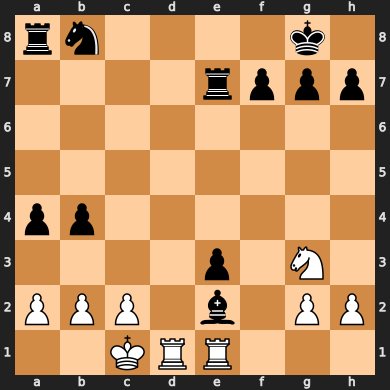

In [328]:
render_random_tactic(forced_mate_boards_all)

In [296]:
len(forced_mate_boards_all)

213

In [303]:
forced_mate_boards_all[0]

('2RQ4/1P6/8/8/2p5/2k5/8/4K3 w - - 3 52',
 'glennergy vs. Luc777 (0.5) [Philidor-Defense]',
 'https://www.chess.com/game/live/1403905563')

JustinianP vs. Luc777 (1) [Philidor-Defense]
https://www.chess.com/game/live/12232676
W, Move 38


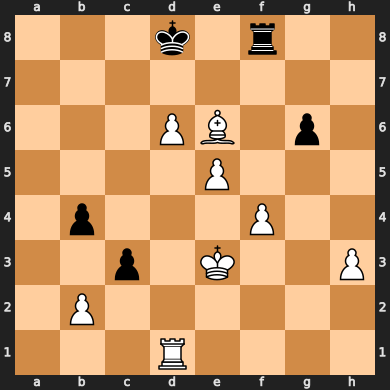

In [312]:
render_tactic(forced_mate_boards_all[200]) # Put player to move

JustinianP vs. Luc777 (1) [Philidor-Defense]
https://www.chess.com/game/live/12232676
W


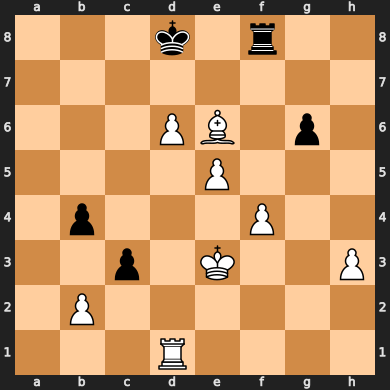

In [307]:
render_tactic(forced_mate_boards_all[200]) 

glennergy vs. Luc777 (0.5) [Philidor-Defense]
https://www.chess.com/game/live/1403905563


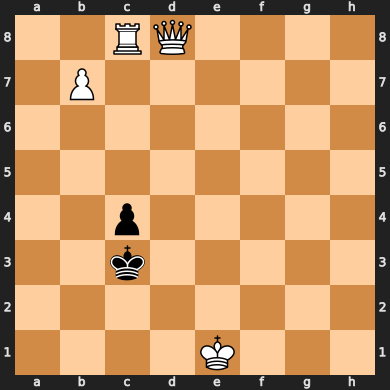

In [293]:
render_tactic(forced_mate_boards_all[0])

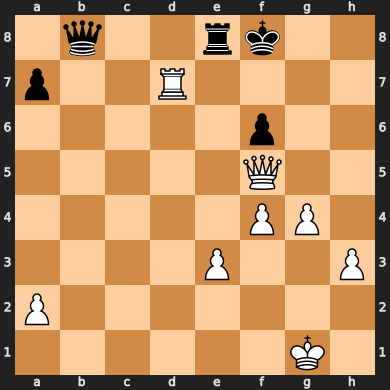

In [267]:
chess.Board(forced_mate_boards_5[3][0])

## Using Stockfish (Chess Engine)

In [178]:
# Using stockfish
# first: pip install stockfish
# second: sudo apt install stockfish
from stockfish import Stockfish

In [179]:
stockfish_engine = Stockfish(parameters={"Threads": 7})
stockfish_engine.get_parameters()

{'Write Debug Log': 'false',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Threads': 7,
 'Ponder': 'false',
 'Hash': 16,
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 30,
 'Minimum Thinking Time': 20,
 'Slow Mover': 80,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350}

In [180]:
#stockfish_engine.set_depth()
#dir(stockfish_engine)


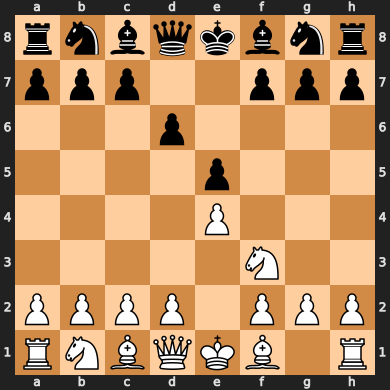

In [182]:
import chess
chess.Board(position_example)


In [183]:
stockfish_engine.get_best_move()

'd2d4'

In [184]:
stockfish_engine.get_evaluation()

{'type': 'cp', 'value': 244}

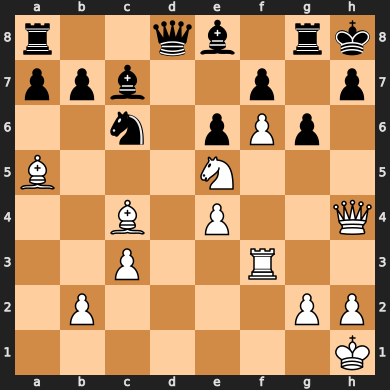

In [134]:
# Test, mate in 2
pos_ez = "r2qb1rk/ppb2p1p/2n1pPp1/B3N3/2B1P2Q/2P2R2/1P4PP/7K w - - 0 1"
chess.Board(pos_ez)

In [136]:
stockfish_engine.set_fen_position(pos_ez)
proposed_moves = stockfish_engine.get_top_moves()
assert(proposed_moves[0]['Mate'] == 2)

In [147]:
#dir(stockfish_engine)

In [137]:
proposed_moves

[{'Move': 'h4h7', 'Centipawn': None, 'Mate': 2},
 {'Move': 'a5c7', 'Centipawn': 93, 'Mate': None},
 {'Move': 'e5c6', 'Centipawn': -370, 'Mate': None},
 {'Move': 'f3d3', 'Centipawn': -514, 'Mate': None},
 {'Move': 'e5g6', 'Centipawn': -917, 'Mate': None}]

In [117]:
fbook = 'data/performance.bin'

In [62]:
positions_sorted_fen[5][0]

'rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR'

In [110]:
chess.Board(positions_sorted_fen[9][0]).fen()

'rnbqkbnr/pp1ppppp/8/2p5/4P3/5N2/PPPP1PPP/RNBQKB1R w - - 0 1'

In [119]:
board_ex = chess.Board('rnbqkbnr/ppp2ppp/3p4/4p3/3PP3/5N2/PPP2PPP/RNBQKB1R b KQkq - 0 3')#positions_sorted_fen[9][0])
find_all_book_moves(board_ex, fbook)

Entry 1: e5d4, weight: 190
Entry 1: d8e7, weight: 11
Entry 1: f7f5, weight: 7


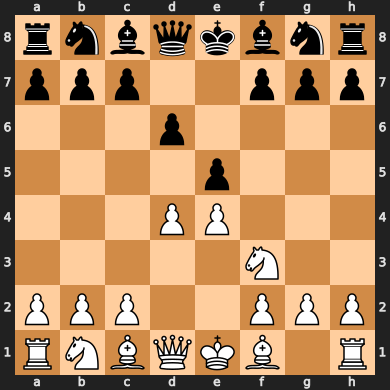

In [120]:
board_ex

In [75]:
from chess_analytics.utils import evaluate_position, evaluate_position_sf


In [199]:
analyze_position(fen_ex)

{'depth': 20,
 'seldepth': 2,
 'multipv': 1,
 'score': PovScore(Mate(+1), WHITE),
 'nodes': 844,
 'nps': 281333,
 'tbhits': 0,
 'time': 0.003,
 'pv': [Move.from_uci('f3f7')]}

In [192]:
fen_ex = "r1bqkbnr/p1pp1ppp/1pn5/4p3/2B1P3/5Q2/PPPP1PPP/RNB1K1NR w KQkq - 2 4"

In [193]:
analyze_position(fen_ex)

{'depth': 20,
 'seldepth': 2,
 'multipv': 1,
 'score': PovScore(Mate(+1), WHITE),
 'nodes': 844,
 'nps': 281333,
 'tbhits': 0,
 'time': 0.003,
 'pv': [Move.from_uci('f3f7')]}

In [194]:
analyze_position_sf(fen_ex)

{'type': 'mate', 'value': 1}

In [107]:
board.fen()

'r1bqkbnr/p1pp1ppp/1pn5/4p3/2B1P3/5Q2/PPPP1PPP/RNB1K1NR w KQkq - 2 4'

In [109]:
board_ex.fen()

'rnbqkbnr/pp1ppppp/8/2p5/4P3/5N2/PPPP1PPP/RNBQKB1R w - - 0 1'

In [84]:
info = engine.analyse(board_ex, chess.engine.Limit(depth=20))

In [88]:
result = engine.play(board_ex, chess.engine.Limit(time=0.1))
result

<PlayResult at 0x7ff213b69fd0 (move=c2c3, ponder=e7e6, info={}, draw_offered=False, resigned=False)>

In [85]:
info

{'depth': 20,
 'seldepth': 31,
 'multipv': 1,
 'score': PovScore(Cp(+98), WHITE),
 'nodes': 2937835,
 'nps': 1063277,
 'tbhits': 0,
 'time': 2.763,
 'pv': [Move.from_uci('c2c3'),
  Move.from_uci('e7e6'),
  Move.from_uci('d2d4'),
  Move.from_uci('d7d5'),
  Move.from_uci('e4d5'),
  Move.from_uci('e6d5'),
  Move.from_uci('c3c4'),
  Move.from_uci('c5d4'),
  Move.from_uci('f3d4'),
  Move.from_uci('g8f6'),
  Move.from_uci('b1c3'),
  Move.from_uci('b8c6'),
  Move.from_uci('d4c6'),
  Move.from_uci('b7c6'),
  Move.from_uci('c4d5'),
  Move.from_uci('f6d5'),
  Move.from_uci('f1c4'),
  Move.from_uci('d8e7'),
  Move.from_uci('e1f1'),
  Move.from_uci('d5c3'),
  Move.from_uci('b2c3'),
  Move.from_uci('c8d7')],
 'hashfull': 904}

In [83]:
info

{'depth': 20,
 'seldepth': 2,
 'multipv': 1,
 'score': PovScore(Mate(+1), WHITE),
 'nodes': 844,
 'nps': 281333,
 'tbhits': 0,
 'time': 0.003,
 'pv': [Move.from_uci('f3f7')]}

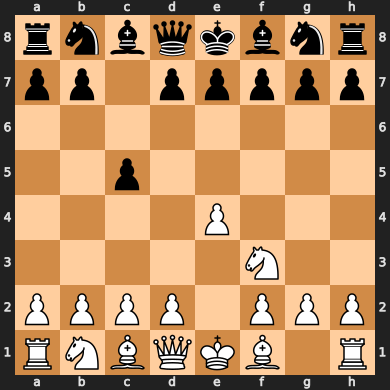

In [71]:
board_ex

In [ ]:
#####

In [ ]:
# Need FEN
#for i in range(len(game.moves)):
#    board = game.play_nth_move(i)

In [142]:
moves_ = ["e2e4", "e7e5"]
stockfish_engine.set_position(moves_)

In [143]:
stockfish_engine.get_best_move()

'g1f3'

In [144]:
stockfish_engine.get_evaluation()

{'type': 'cp', 'value': 166}

In [145]:
stockfish_engine.get_board_visual()

'+---+---+---+---+---+---+---+---+\n| r | n | b | q | k | b | n | r |\n+---+---+---+---+---+---+---+---+\n| p | p | p | p |   | p | p | p |\n+---+---+---+---+---+---+---+---+\n|   |   |   |   |   |   |   |   |\n+---+---+---+---+---+---+---+---+\n|   |   |   |   | p |   |   |   |\n+---+---+---+---+---+---+---+---+\n|   |   |   |   | P |   |   |   |\n+---+---+---+---+---+---+---+---+\n|   |   |   |   |   |   |   |   |\n+---+---+---+---+---+---+---+---+\n| P | P | P | P |   | P | P | P |\n+---+---+---+---+---+---+---+---+\n| R | N | B | Q | K | B | N | R |\n+---+---+---+---+---+---+---+---+\n'

In [146]:
stockfish_engine.set_fen_position(position_example)

In [147]:
stockfish_engine.get_board_visual()

'+---+---+---+---+---+---+---+---+\n| r |   | b | q | k | b | n | r |\n+---+---+---+---+---+---+---+---+\n| p | p | p | p |   | p | p | p |\n+---+---+---+---+---+---+---+---+\n|   |   | n |   |   |   |   |   |\n+---+---+---+---+---+---+---+---+\n|   |   |   |   |   |   |   |   |\n+---+---+---+---+---+---+---+---+\n|   |   |   | N | P |   |   |   |\n+---+---+---+---+---+---+---+---+\n|   |   |   |   |   |   |   |   |\n+---+---+---+---+---+---+---+---+\n| P | P | P |   |   | P | P | P |\n+---+---+---+---+---+---+---+---+\n| R | N | B | Q | K | B |   | R |\n+---+---+---+---+---+---+---+---+\n'

In [148]:
stockfish_engine.get_top_moves()

[{'Move': 'd8h4', 'Centipawn': -272, 'Mate': None},
 {'Move': 'd8f6', 'Centipawn': -119, 'Mate': None},
 {'Move': 'd8e7', 'Centipawn': -67, 'Mate': None},
 {'Move': 'g8f6', 'Centipawn': -35, 'Mate': None},
 {'Move': 'd7d5', 'Centipawn': -35, 'Mate': None}]

In [152]:
stockfish_engine.get_stockfish_major_version()

11

In [74]:
print(positions_sorted[n][0])

r n b q k b n r
p p . . p p p p
. . . p . . . .
. . p . . . . .
. . . P P . . .
. . . . . N . .
P P P . . P P P
R N B Q K B . R


In [31]:
positions_sorted[:3]

[('r n b q k b n r\np p p p p p p p\n. . . . . . . .\n. . . . . . . .\n. . . . . . . .\n. . . . . . . .\nP P P P P P P P\nR N B Q K B N R',
  1965),
 ('r n b q k b n r\np p p p p p p p\n. . . . . . . .\n. . . . . . . .\n. . . . P . . .\n. . . . . . . .\nP P P P . P P P\nR N B Q K B N R',
  1578),
 ('r n b q k b n r\np p p p . p p p\n. . . . . . . .\n. . . . p . . .\n. . . . P . . .\n. . . . . . . .\nP P P P . P P P\nR N B Q K B N R',
  862)]

In [64]:
print(positions_sorted[5][0])

r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [56]:
len([k for k,v in positions_sorted if v==1])

105150

In [49]:
len(unique_positions)

107655

In [ ]:
len(set())

In [43]:
Counter(list_of_positions)

Counter({'r n b q k b n r\np p p p p p p p\n. . . . . . . .\n. . . . . . . .\n. . . . . . . .\n. . . . . . . .\nP P P P P P P P\nR N B Q K B N R': 1,
         'r n b q k b n r\np p p p p p p p\n. . . . . . . .\n. . . . . . . .\n. . . P . . . .\n. . . . . . . .\nP P P . P P P P\nR N B Q K B N R': 1,
         'r n b q k b n r\np p p p p . p p\n. . . . . p . .\n. . . . . . . .\n. . . P . . . .\n. . . . . . . .\nP P P . P P P P\nR N B Q K B N R': 1,
         'r n b q k b n r\np p p p p . p p\n. . . . . p . .\n. . . . . . . .\n. . . P . . . .\n. . . . . N . .\nP P P . P P P P\nR N B Q K B . R': 1,
         'r . b q k b n r\np p p p p . p p\n. . n . . p . .\n. . . . . . . .\n. . . P . . . .\n. . . . . N . .\nP P P . P P P P\nR N B Q K B . R': 1})

In [ ]:
for 

In [19]:
a = library.df.Game.iloc[0].play_nth_move(5)

In [28]:
b = library.df.Game.iloc[5].play_nth_move(5)

In [22]:
str(a)

'r . b q k b n r\np p p p p . p p\n. . n . . p . .\n. . . . . . . .\n. . . P . . . .\n. . . . P N . .\nP P P . . P P P\nR N B Q K B . R'

In [34]:
print(b)
print(type(b))

r . b q k b n r
p p . p p p p p
. . n . . . . .
. . p . . . . .
. . . P P . . .
. . . . . N . .
P P P . . P P P
R N B Q K B . R
<class 'chess.Board'>


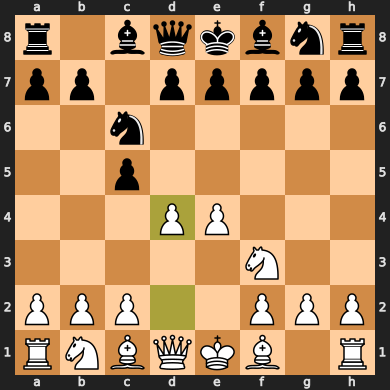

In [32]:
b

In [33]:
str(b)

'r . b q k b n r\np p . p p p p p\n. . n . . . . .\n. . p . . . . .\n. . . P P . . .\n. . . . . N . .\nP P P . . P P P\nR N B Q K B . R'

In [30]:
str(a) == str(b)

False

In [12]:
library.df.Game.iloc[1959].moves

['e4',
 'e5',
 'Nf3',
 'Nc6',
 'c3',
 'Nf6',
 'Bd3',
 'd5',
 'c4',
 'dxe4',
 'Bxe4',
 'Nxe4',
 'Qe2',
 'Nf6',
 'Nxe5',
 'Nxe5',
 'Qxe5+',
 'Qe7',
 'd4',
 'Qxe5+',
 'dxe5',
 'Ne4',
 'O-O',
 'Be6',
 'Rd1',
 'Bc5',
 'Bg5',
 'Bxf2+',
 'Kf1',
 'Bxc4+',
 'Rd3',
 'Bxd3#']

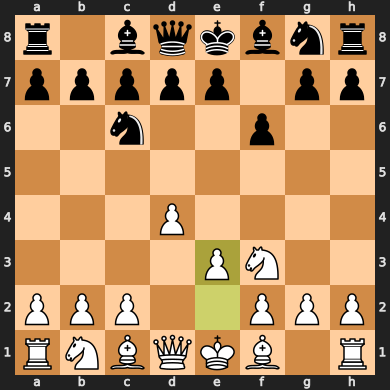

In [9]:
library.df.Game.iloc[0].play_nth_move(5)

In [4]:
print(len(pickle.dumps(library)))


448965


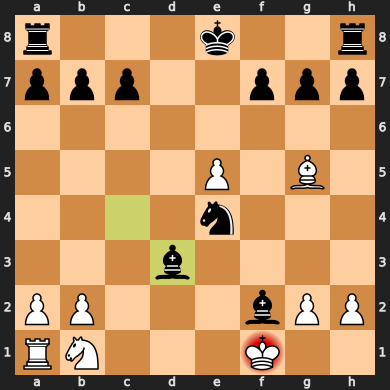

In [70]:
library.df.iloc[1959].Game.play_nth_move(33)

 library.df.tail(10)

In [6]:
# Main line opening frequencies
library.df.opening_chesscom_general.value_counts()[:6]

Scandinavian-Defense    226
Kings-Pawn-Opening      198
Sicilian-Defense        174
Scotch                  147
Philidor-Defense        109
Ruy-Lopez-Opening       103
Name: opening_chesscom_general, dtype: int64

In [7]:
# ECOs --> dataframe with Letter, Digit, Weight
# e.g. ("B", 1, 200) => I've played B01 200 times.
#eco_df = pd.DataFrame([(rank, int(row), weight) for rank,row,weight in zip(ranks, rows, weights)],
#                      columns = ['digit', 'letter', 'weight'])

In [8]:
import seaborn as sns
# Given ranks, rows, weights
def split_eco_codes(library):
    """Gets the ranks, rows, weights from a library
    e.g. ('A', 1, 5), ('A', 22, 2), ('B', 23, 7)."""
    ecos = library.df.ECO.value_counts()
    ecos, eco_counts = ecos.index, ecos.values
    ranks  = [e[0] for e in ecos if not e[1:].isalpha()]
    rows = [e[1:] for e in ecos if not e[1:].isalpha()]
    weights =  [eco_counts[i] for i in range(len(ecos)) if not ecos[i].isalpha()]
    return ranks, rows, weights
    
def plot_eco_distributions(library):
    """Given a library, plot the distribution of ECO codes."""
    ranks, rows, weights = split_eco_codes(library)
    weighted_data = []
    for rank, row, weight in zip(ranks, rows, weights):
        if not row.isalpha():
            for i in range(weight):   
                weighted_data.append((rank,int(row), 1))

    eco_df = pd.DataFrame(weighted_data, columns = ['letter', 'digit', 'weight'])
    sns.catplot(x="letter", y="digit", data=eco_df, order=['A','B','C','D','E'], height=10, aspect=1)

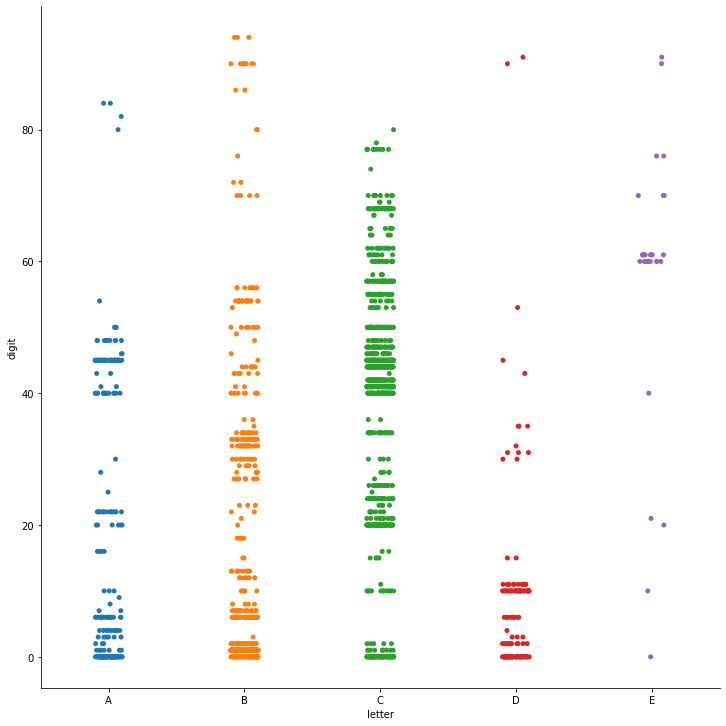

In [9]:
plot_eco_distributions(library)

In [10]:
def ECO_2D_histogram(ranks, rows, weights):
    """2D Histogram from letters, digits, weights."""
    fig, ax = plt.subplots()
    to_num = lambda x: ord(x) - 65
    h = ax.hist2d([int(r) for r in rows], [to_num(letter) for letter in ranks],
                  weights = weights,bins=[10, len(set(ranks))], vmin=1, vmax=200)
    ax.set_yticks([i*0.8+ 0.4 for i in range(len(set(ranks)))])
    ax.set_yticklabels(set(ranks))
    ax.set_yticklabels(['A', 'B','C', 'D', 'E'])
    ax.set_title("ECO Histogram")
    clb = fig.colorbar(h[3], ax=ax)

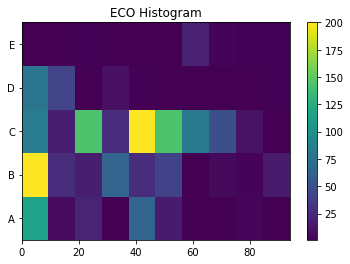

In [11]:
ECO_2D_histogram(*split_eco_codes(library))

## Similar Game Positions
"Retrieval of Similar Game Positions", techniques from IR to do approximate matching:
Source: http://doras.dcu.ie/20378/1/ganguly-sigir2014.pdf

1) What about the simplest case, absolute matching? Using sets to see how similar moves are.

2) Looking at longest common move sequence (starting from move 1).

In [13]:
# Given game A, see how long it matches game B. Start with same color
library.__doc__

'Reads in all pgns in parent_dir, generates a dataframe of the library with\n    summaries of each game as rows.'

In [16]:
library.loadin_games()

In [17]:
library.df['Game'].iloc[:5]

0                            1. d4 f6 2. Nf3 Nc6 3. e3
1    1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. c3 Nf6 5. d4...
2    1. e4 d5 2. exd5 Nf6 3. Nc3 c6 4. dxc6 Nxc6 5....
3    1. d4 d5 2. c3 Nf6 3. Qa4+ Bd7 4. Qb3 Nc6 5. Q...
4    1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Bxc6 dxc6 5. ...
Name: Game, dtype: object

In [28]:
game_a = library.df.sample(1).iloc[0].Game
game_b = library.df.sample(1).iloc[0].Game

In [30]:
from chess_analytics.utils import compare_games
compare_games(game_a, game_b), compare_games(game_a, game_b, method='jaccard')

(0.2619047619047619, 0.13924050632911392)

In [ ]:
# TODO - Formalize this and put it in utils

In [31]:
def most_similar_game(root_game, library, verbose=False):
    """Find the game with the highest Jaccard Similarity with move sets, where the user is
    playing the same color. """
    games = library.df.Game.values
    games_list = []
    color = 'White' if root_game.headers['White'] == library.username else 'Black'
    
    for game_other in games:
        # Skip identical games
        if game_other.pgn != root_game.pgn:
            if color is not None and game_other.headers[color] == library.username:
                games_list.append(game_other)

    jacc_sims = [jaccard_similarity(root_game, game_i) for game_i in games_list]
    if verbose:
        print(stats.describe(jacc_sims), f"Max at {np.argmax(jacc_sims)}")
        
    return games_list[np.argmax(jacc_sims)] 
          

In [116]:
def get_most_similar_games(library, limit=1000):
    """For each game, find the single most similar game to it in the library."""
    similar_games = []
    similarity_scores = []
    for game in library.df.Game.values[:limit]:
        most_sim_game = most_similar_game(game, library)
        similar_games.append(most_sim_game)
        similarity_scores.append(jaccard_similarity(game, most_sim_game))
    return similar_games, similarity_scores

In [30]:
%%time
# For 2000+ games: 26.1 seconds
similar_games, scores = get_most_similar_games(library, limit=10000)

CPU times: user 25.9 s, sys: 480 µs, total: 25.9 s
Wall time: 25.9 s


In [38]:
import scipy.stats as stats
stats.describe(scores)

DescribeResult(nobs=1969, minmax=(0.0, 0.8), mean=0.28819128681721423, variance=0.005638683970610291, skewness=1.9283188822596478, kurtosis=6.690710007535882)

In [113]:
np.array(scores)[np.argsort(scores)][-3]

0.75

In [109]:
np.array(similar_games)[np.argsort(scores)][-3].moves

['e3', 'e5', 'Qh5', 'Nc6', 'Bc4', 'Nf6', 'Qxf7#']

In [117]:
np.array(similar_games)[np.argsort(scores)][-3].describe()

['Computer2-MEDIUM',
 'Luc777',
 1,
 '1389',
 '1233',
 'A00',
 "Anderssen's Opening  *",
 '2010.04.05',
 '300',
 'https://www.chess.com/game/live/17927261',
 'data/user_games/Luc777/2010/04/game_57.txt']

In [118]:
library.df.Game.values[np.argsort(scores)[-3]].describe()

['thechessrookie',
 'Luc777',
 1,
 '1109',
 '1008',
 'C20',
 'King Pawn Game; C20 *',
 '2009.12.29',
 '300',
 'https://www.chess.com/game/live/5418474',
 'data/user_games/Luc777/2009/12/game_40.txt']

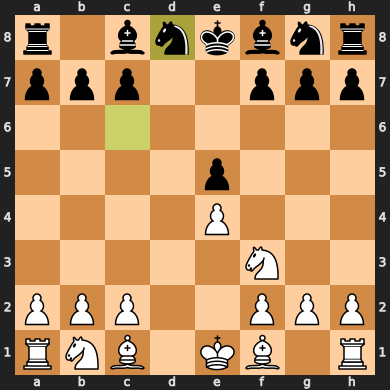

In [119]:
# Most similar
similar_games[600].play_nth_move(10)

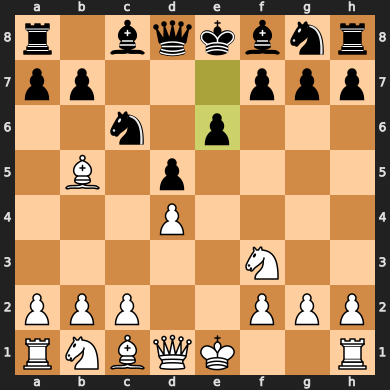

In [120]:
# Most similar
library.df.Game.iloc[600].play_nth_move(10)

#### Random Jaccard Similarity|

In [121]:
jaccs_random = [jaccard_similarity(game, library.df.sample(1).Game.iloc[0]) for game in library.df.Game]

In [122]:
stats.describe(jaccs_random)

DescribeResult(nobs=1969, minmax=(0.0, 1.0), mean=0.11922032297049488, variance=0.002017645180175346, skewness=4.190113079170535, kurtosis=74.72801921290501)

Text(0.5, 1.0, 'JS of most similar game vs random game')

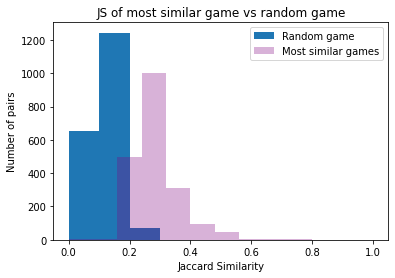

In [123]:
fig, ax = plt.subplots()
ax.hist(jaccs_random, label='Random game')
ax.hist(scores, alpha=0.3, color='purple', label='Most similar games')
ax.legend()
ax.set_xlabel("Jaccard Similarity")
ax.set_ylabel("Number of pairs")
ax.set_title("JS of most similar game vs random game")

### Top time controls

<BarContainer object of 10 artists>

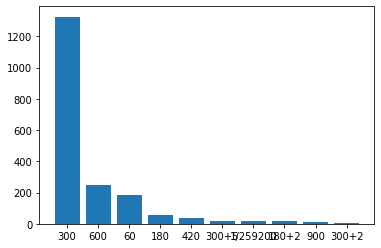

In [722]:
fig, ax = plt.subplots()
indices = library.df.Time.value_counts().index
counts = library.df.Time.value_counts().values

ax.bar(indices[:10], counts[:10])

In [691]:
sim_game.describe()

['Luc777',
 'DarthEast',
 0,
 '976',
 '1493',
 'C50',
 'Italian Game; C50 *',
 '2015.06.10',
 '1/259200',
 'https://www.chess.com/game/daily/112662900',
 'data/user_games/Luc777/2015/06/game_1.txt']

In [599]:
sim_game.describe()

['Luc777',
 'miltond',
 1,
 '1274',
 '1360',
 'C50',
 'Italian Game; C50 *',
 '2014.04.26',
 '300',
 'https://www.chess.com/game/live/789656255',
 'data/user_games/Luc777/2014/04/game_5.txt']

In [600]:
root_game.describe()

['viola1284',
 'Luc777',
 1,
 '1221',
 '1307',
 'A00',
 "Anderssen's Opening  *",
 '2013.05.16',
 '300',
 'https://www.chess.com/game/live/515690185',
 'data/user_games/Luc777/2013/05/game_1.txt']

In [583]:
print(stats.describe(jacc_sims))

DescribeResult(nobs=200, minmax=(0.0, 1.0), mean=0.12526944468659754, variance=0.00489373263009991, skewness=9.814051112067137, kurtosis=120.65868180040954)


In [573]:
sim_game = games_list[closest_index]

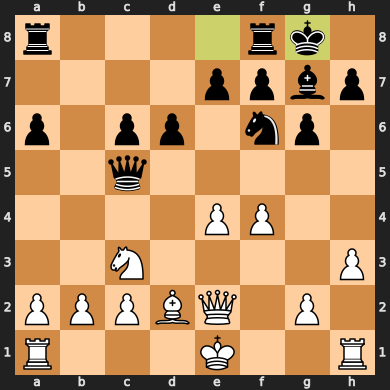

In [580]:
play_nth_move(sim_game.game, 30)

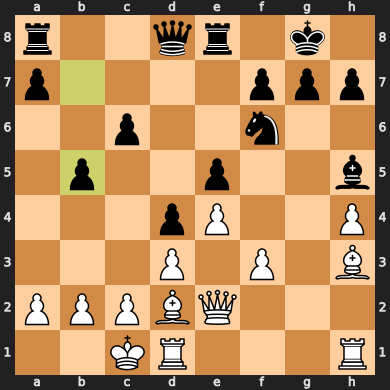

In [579]:
play_nth_move(root_game.game, 30)

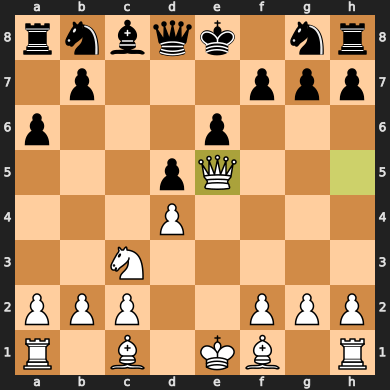

In [547]:
play_nth_move(sim_game.game, 15)

In [511]:
sys.getsizeof(moves_lists)

256

In [513]:
sys.getsizeof(moves_lists[0])

976

In [514]:
sys.getsizeof(game_r)

48

In [474]:
def test_valid_moves(moves):
    """True if all moves look like valid chess moves."""
    filter_char = lambda char: char.isalnum() or char == '-' or char == '+'
    filter_word = lambda word: len(word) == len([letter for letter in word if filter_char(letter)])
    moves_filtered = [move for move in moves if filter_word(move)]
    print(moves)
    return(len(moves)==len(moves_filtered))
    

In [475]:
test_valid_moves(game_a_.moves)

8 8
['e4', 'd5', 'Nf3', 'dxe4', 'Nh4', 'e5', 'f3', 'Qxh4+']


True

### Winrates

In [5]:
library.winrates()

(0.4724245577523413, 0.4652777777777778)

In [7]:
def plot_wrs(white_wr, black_wr):
    """Plot 2 bars, mean to represent white/black winrate."""
    fig, ax = plt.subplots()
    ax.bar(['White'], [white_wr])
    ax.bar(['Black'], [black_wr], color='purple')

    ax.set_title("Win Rate by Color")
    ax.set_ylim(0,1.0)

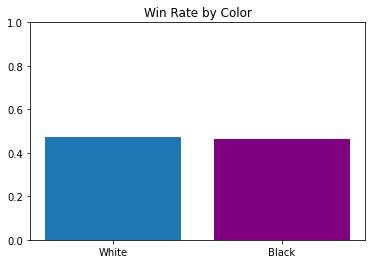

In [9]:
plot_wrs(*library.winrates())

In [11]:
def openings_and_games(library, color):
    """Returns a list of openings (specific) and the dataframe for one color."""
    openings = library.extract_openings_from_ecourl(color=color)
    return openings, library.df[library.df[color] == library.username]


In [12]:
### Winrate by opening, for black
openings, black_games = openings_and_games(library, 'Black')

In [13]:
openings

['Queens-Pawn-Opening',
 'Alekhines-Defense-Scandinavian-Variation-3.exd5',
 'Queens-Pawn-Opening-1...d5',
 'Four-Knights-Game-Spanish-Variation-Ranken-Variation-5...dxc6',
 'Alekhines-Defense-Scandinavian-Variation-3.exd5',
 'Scandinavian-Defense-Modern-Scandinavian-Gambit',
 'Indian-Game-Slav-Indian-Defense',
 'Queens-Pawn-Opening-Accelerated-London-System',
 'Queens-Gambit-Declined-Queens-Knight-Variation-3...Nf6',
 'Indian-Game-2.Nc3',
 'Vant-Kruijs-Opening-1...e5',
 'Queens-Pawn-Opening-Torre-Attack-3...e6',
 'Scandinavian-Defense-Modern-Variation-3.d4-c6-4.dxc6',
 'Alekhines-Defense-Scandinavian-Variation-3.exd5',
 'Trompowsky-Attack',
 'Kings-Indian-Attack-2...Nc6',
 'Birds-Opening-Dutch-Williams-Gambit',
 'Scandinavian-Defense',
 'Scandinavian-Defense',
 'Indian-Game',
 'Scandinavian-Defense-Modern-Marshall-Variation-4.c4-Nb6-5.Nc3',
 'Birds-Opening',
 'Alekhines-Defense-Scandinavian-Variation-3.exd5',
 'Scandinavian-Defense-Modern-Variation-3.c4',
 'Alekhines-Defense-Scandinav

In [23]:
def get_results_by_opening(df, openings, opening='Ruy-Lopez', color='White'):
    """Returns (wins, losses, draws) for a given opening/color."""
    mask = [opening in op for op in openings]
    df = df[mask]
    if color=="White":   
        return (len(df[df.Result==1]), len(df[df.Result==0]), len(df[df.Result==0.5]))
    else:
        return (len(df[df.Result==0]), len(df[df.Result==1]), len(df[df.Result==0.5]))

In [24]:
get_results_by_opening(black_games, openings, opening='Sicilian')

(0, 3, 0)

In [29]:
wins, losses, draws = get_results_by_opening(black_games, openings, opening='Kings-Pawn')
total = wins+losses+draws
print(total)
print(wins/total, losses/total, draws/total)

80
0.45 0.4875 0.0625


In [28]:
# White, playing Italian
get_results_by_opening(black_games, openings, opening='Italian-Game')

(22, 15, 1)

In [74]:
# Top openings (white)
openings_wh = library.opening_frequencies(color='White')

52
959


In [114]:
def results_by_openings(library, color = 'White'):
    openings, games = openings_and_games(library, color)
    # Top openings (white)
    opening_freqs = library.opening_frequencies(color=color)

    # Get results for top openings
    opening_wrs = {}
    for main_op in [x[0] for x in opening_freqs]:
        opening_wrs[main_op] = get_results_by_opening(games, openings, opening=main_op, color=color)
    
    return opening_wrs

In [124]:
results_by_opening_white = results_by_openings(library, 'White')

52
959


In [124]:
# TODO - Ensure that if the first 3 tokens are correct, the opening is combined
#df_results

73
1008


<IPython.core.display.Javascript object>


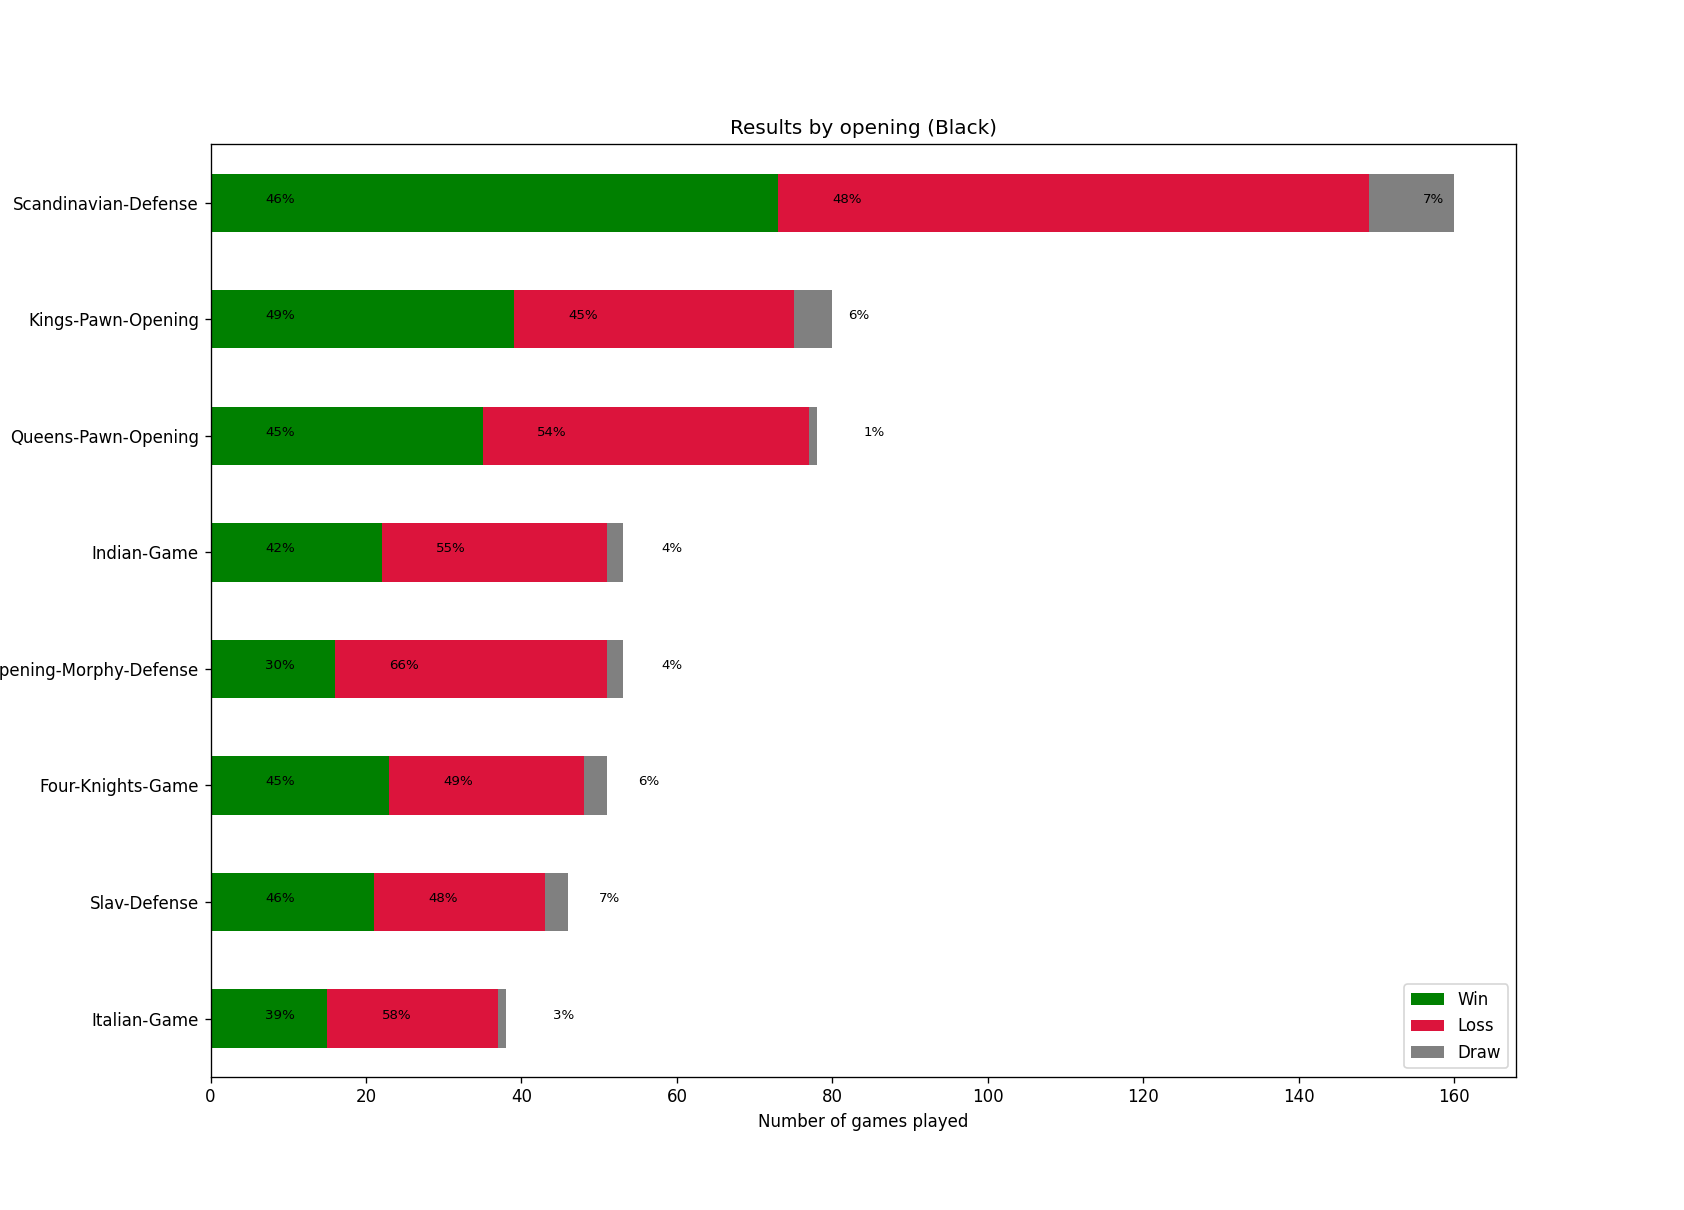

In [232]:
plot_results_by_opening(library, color='Black')

In [116]:
results_by_openings(library, 'Black')

73
1008


{'Scandinavian-Defense': (73, 76, 11),
 'Kings-Pawn-Opening': (39, 36, 5),
 'Queens-Pawn-Opening': (35, 42, 1),
 'Indian-Game': (22, 29, 2),
 'Ruy-Lopez-Opening-Morphy-Defense': (16, 35, 2),
 'Four-Knights-Game': (23, 25, 3),
 'Slav-Defense': (21, 22, 3),
 'Italian-Game': (15, 22, 1),
 'Alekhines-Defense-Scandinavian-Variation': (22, 13, 2),
 'Bishops-Opening': (17, 24, 1),
 'Vant-Kruijs-Opening': (14, 14, 0),
 'Petrovs-Defense': (16, 11, 0),
 'Kings-Indian-Defense': (14, 11, 1),
 'Kings-Gambit': (8, 16, 1),
 'Giuoco-Piano-Game': (9, 14, 0),
 'Reti-Opening': (14, 8, 1),
 'Scotch-Game': (6, 15, 0),
 'Vienna-Game': (10, 8, 2),
 'Queens-Gambit': (6, 12, 0),
 'Center-Game-Accepted': (10, 7, 0),
 'Ponziani-Opening': (5, 8, 1),
 'Kings-Fianchetto-Opening': (6, 5, 0),
 'Birds-Opening': (4, 5, 0),
 'English-Opening-Two-Knights-Variation': (5, 3, 0),
 'French-Defense': (3, 5, 0),
 'Van-Geet-Opening': (4, 3, 1),
 'Englund-Gambit-Declined-Reversed-French-Variation': (1, 5, 0),
 'Nimzowitsch-Larse

### Working with openings

In [5]:
%%time
openings = library.opening_frequencies()

72
1967
CPU times: user 24.2 s, sys: 99.6 ms, total: 24.3 s
Wall time: 24.3 s


In [6]:
openings_bk = library.opening_frequencies(color='Black')

73
1008


In [10]:
openings_bk[:10]

[('Scandinavian-Defense', 160),
 ('Kings-Pawn-Opening', 80),
 ('Queens-Pawn-Opening', 78),
 ('Indian-Game', 53),
 ('Ruy-Lopez-Opening-Morphy-Defense', 53),
 ('Four-Knights-Game', 48),
 ('Slav-Defense', 42),
 ('Italian-Game', 38),
 ('Alekhines-Defense-Scandinavian-Variation', 37),
 ('Bishops-Opening', 30)]

In [11]:
openings_wh = library.opening_frequencies(color='White')

52
959


In [12]:
openings_wh[:10]

[('Sicilian-Defense', 171),
 ('Kings-Pawn-Opening', 118),
 ('Scotch', 118),
 ('Philidor-Defense', 109),
 ('Scandinavian-Defense', 66),
 ('Italian-Game', 60),
 ('Ruy-Lopez-Opening', 43),
 ('French-Defense-Normal-Variation', 29),
 ('Pirc-Defense', 29),
 ('Modern-Defense-with', 28)]

In [7]:
library.username

'Luc777'

In [13]:
%matplotlib notebook
def plot_openings(opening_freqs):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh([o[0] for o in opening_freqs],
           [o[1] for o in opening_freqs])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.invert_yaxis()


<IPython.core.display.Javascript object>


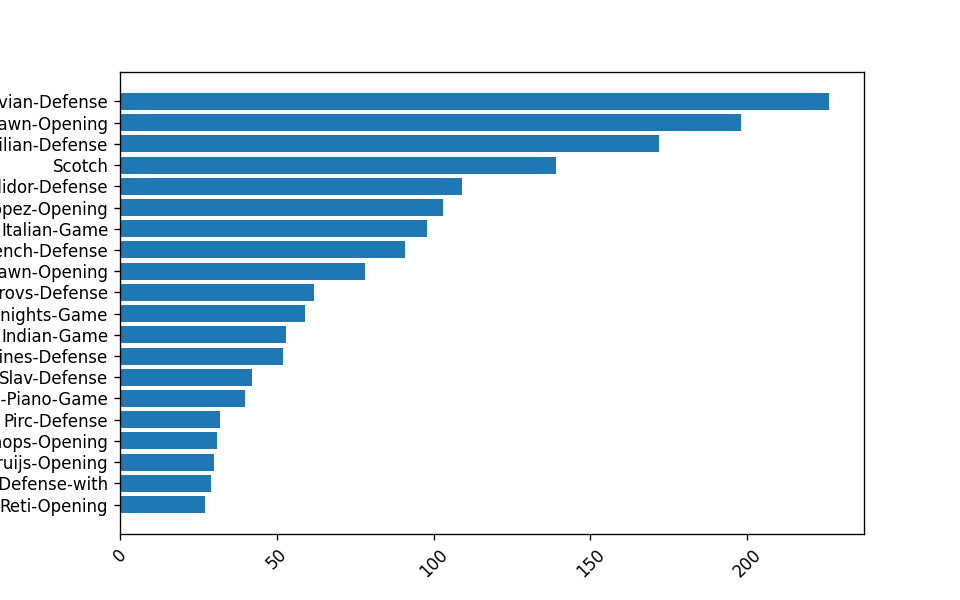

In [14]:
plot_openings(openings[:20])

In [34]:
ops[np.argmax(ops_counts)]

'https://www.chess.com/openings/Scandinavian-Defense-Mieses-Kotrc-Main-Line'

In [33]:
f = lambda i: ops_counts[i]
max(range(len(ops_counts)), key=f)

440

In [10]:
game.headers['ECOUrl'].split('/')[-1]

'Kings-Pawn-Opening-Kings-Knight-Variation'

In [14]:
game.opening

"King's Knight Opening; C40 *"

In [8]:
library.df.iloc[1966]

White                                         Luc777
Black                                   annneverwins
Result                                             0
WElo                                            1402
BElo                                            1381
ECO                                              C40
Opening                 King's Knight Opening; C40 *
Date                                      2011.08.22
Time                                             300
id         https://www.chess.com/game/live/167183767
fname      data/user_games/Luc777/2011/08/game_1.txt
Name: 1966, dtype: object

### Random Game 

In [52]:
game_rnd.opening

'Classical Variation, Italian; C53 *'

In [53]:
str(game_rnd)

'1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Bc4 Bc5 5. c3 Nf6 6. cxd4 Bb4+ 7. Bd2 Bxd2+ 8. Nbxd2 O-O 9. Qb3 Qe7 10. O-O Na5 11. Qc3 Nxc4 12. Qxc4 d6 13. Rac1 c6 14. d5 Bd7 15. Rfe1 Qd8 16. e5 cxd5 17. Qh4 dxe5 18. Rxe5 Re8 19. Rce1 Qc7 20. Rxe8+ Rxe8 21. Rxe8+ Bxe8 22. h3 Qc2 23. Kh2 Qxb2 24. Qa4 Bxa4 25. Ne5 Qxe5+ 26. g3 Nh5 27. Nf3 Qb2 28. h4 Nxg3 29. Kxg3 Qxa2 30. Kh3 Qb3'

In [54]:
game_rnd.moves

['e4',
 'e5',
 'Nf3',
 'Nc6',
 'd4',
 'exd4',
 'Bc4',
 'Bc5',
 'c3',
 'Nf6',
 'cxd4',
 'Bb4+',
 'Bd2',
 'Bxd2+',
 'Nbxd2',
 'O-O',
 'Qb3',
 'Qe7',
 'O-O',
 'Na5',
 'Qc3',
 'Nxc4',
 'Qxc4',
 'd6',
 'Rac1',
 'c6',
 'd5',
 'Bd7',
 'Rfe1',
 'Qd8',
 'e5',
 'cxd5',
 'Qh4',
 'dxe5',
 'Rxe5',
 'Re8',
 'Rce1',
 'Qc7',
 'Rxe8+',
 'Rxe8',
 'Rxe8+',
 'Bxe8',
 'h3',
 'Qc2',
 'Kh2',
 'Qxb2',
 'Qa4',
 'Bxa4',
 'Ne5',
 'Qxe5+',
 'g3',
 'Nh5',
 'Nf3',
 'Qb2',
 'h4',
 'Nxg3',
 'Kxg3',
 'Qxa2',
 'Kh3',
 'Qb3']

In [409]:
def play_nth_move(game, n):
    board = game.board()
    moves = list(game.mainline_moves())
    for move in moves[:n]:
        board.push(move)
    return board

In [416]:
### Play first 5 ply
n = 5
play_nth_move(game_rnd.game, n)

In [9]:
game_rnd.describe()

['Luc777',
 'bendavidovich',
 1,
 '1378',
 '1378',
 'B32',
 'B32 *',
 '2021.01.26',
 '300',
 'https://www.chess.com/game/live/6349366503',
 'data/user_games/Luc777/2021/01/game_41.txt']

### Experimental: Game similarity
(Working with clean pgn and moves)

In [11]:
print(game_rnd.pgn)
print()
print(game_rnd.moves)

1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 e5 5. Nf3 Nf6 6. Nc3 Bb4 7. Bc4 O-O 8. Qd3 a6 9. Bg5 h6 10. Bh4 Be7 11. O-O-O b5 12. Bxf6 Bxf6 13. Bd5 Bb7 14. h4 Ra7 15. g4 Nb4 16. Qe2 d6 17. h5 Nxd5 18. Nxd5 Bg5+ 19. Kb1 Qa5 20. Nh4 b4 21. Qc4 Bxd5 22. Rxd5 Qc7 23. Qxc7 Rxc7 24. Rxd6 Ra8 25. Rd5 Bf4 26. Ng2 a5 27. Nxf4 exf4 28. g5 hxg5 29. Rxg5 a4 30. h6 g6 31. Rb5 b3 32. cxb3 axb3 33. Rxb3 Rc4 34. h7+ Kh8 35. Rb7 Rxe4 36. Rxf7

['e4', 'c5', 'Nf3', 'Nc6', 'd4', 'cxd4', 'Nxd4', 'e5', 'Nf3', 'Nf6', 'Nc3', 'Bb4', 'Bc4', 'O-O', 'Qd3', 'a6', 'Bg5', 'h6', 'Bh4', 'Be7', 'O-O-O', 'b5', 'Bxf6', 'Bxf6', 'Bd5', 'Bb7', 'h4', 'Ra7', 'g4', 'Nb4', 'Qe2', 'd6', 'h5', 'Nxd5', 'Nxd5', 'Bg5+', 'Kb1', 'Qa5', 'Nh4', 'b4', 'Qc4', 'Bxd5', 'Rxd5', 'Qc7', 'Qxc7', 'Rxc7', 'Rxd6', 'Ra8', 'Rd5', 'Bf4', 'Ng2', 'a5', 'Nxf4', 'exf4', 'g5', 'hxg5', 'Rxg5', 'a4', 'h6', 'g6', 'Rb5', 'b3', 'cxb3', 'axb3', 'Rxb3', 'Rc4', 'h7+', 'Kh8', 'Rb7', 'Rxe4', 'Rxf7']


In [12]:
# Opera Game
opera_game = GameReader("data/opera_game.pgn")
opera_game.pgn

'1. e4 e5 2. Nf3 d6 3. d4 Bg4 4. dxe5 Bxf3 5. Qxf3 dxe5 6. Bc4 Nf6 7. Qb3 Qe7 8. Nc3 c6 9. Bg5 b5 10. Nxb5 cxb5 11. Bxb5+ Nbd7 12. O-O-O Rd8 13. Rxd7 Rxd7 14. Rd1 Qe6 15. Bxd7+ Nxd7 16. Qb8+ Nxb8 17. Rd8#'

### Comparing game similarity
- Using sets of moves, separated by color.
- Finding shared opening sequence in 2 games. 

In [14]:
# Similarity to opera_game
print(opera_game.moves)
print(game_rnd.moves)
print(game_similarity(opera_game.moves, game_rnd.moves))

['e4', 'e5', 'Nf3', 'd6', 'd4', 'Bg4', 'dxe5', 'Bxf3', 'Qxf3', 'dxe5', 'Bc4', 'Nf6', 'Qb3', 'Qe7', 'Nc3', 'c6', 'Bg5', 'b5', 'Nxb5', 'cxb5', 'Bxb5+', 'Nbd7', 'O-O-O', 'Rd8', 'Rxd7', 'Rxd7', 'Rd1', 'Qe6', 'Bxd7+', 'Nxd7', 'Qb8+', 'Nxb8', 'Rd8#']
['e4', 'c5', 'Nf3', 'Nc6', 'd4', 'cxd4', 'Nxd4', 'e5', 'Nf3', 'Nf6', 'Nc3', 'Bb4', 'Bc4', 'O-O', 'Qd3', 'a6', 'Bg5', 'h6', 'Bh4', 'Be7', 'O-O-O', 'b5', 'Bxf6', 'Bxf6', 'Bd5', 'Bb7', 'h4', 'Ra7', 'g4', 'Nb4', 'Qe2', 'd6', 'h5', 'Nxd5', 'Nxd5', 'Bg5+', 'Kb1', 'Qa5', 'Nh4', 'b4', 'Qc4', 'Bxd5', 'Rxd5', 'Qc7', 'Qxc7', 'Rxc7', 'Rxd6', 'Ra8', 'Rd5', 'Bf4', 'Ng2', 'a5', 'Nxf4', 'exf4', 'g5', 'hxg5', 'Rxg5', 'a4', 'h6', 'g6', 'Rb5', 'b3', 'cxb3', 'axb3', 'Rxb3', 'Rc4', 'h7+', 'Kh8', 'Rb7', 'Rxe4', 'Rxf7']
0.35


In [127]:
def game_similarity_colorful(game_1_moves, game_2_moves):
    """Get the overlap between white's moves and black's moves separately"""
    white_moves = game_1_moves[0::2]
    black_moves = game_1_moves[1::2]
    overlap_white = game_similarity(game_1_moves[0::2], game_2_moves[0::2])
    overlap_black = game_similarity(game_1_moves[1::2], game_2_moves[1::2])
    
    print(round(overlap_white,2))
    print(round(overlap_black,2))

In [129]:
game_similarity_colorful(opera_game.moves, game_rnd.moves)

In [17]:
def longest_common_sequence(game_1_moves, game_2_moves):
    """Get length of the longest_common_sequence between 2 games"""
    for i, (m1, m2) in enumerate(zip(game_1_moves, game_2_moves)):
        if m1 == m2:
            continue
        else:
            return game_1_moves[:i]
    return game_1_moves 

In [18]:
shared_opening = longest_common_sequence(opera_game.moves, game_rnd.moves)
print(shared_opening)
print(len(shared_opening))

['e4']
1
